Which sectors experienced the most volatility during Covid?
Was there an increased return with high volatility in the sectors during Covid?

In [1]:
# Import dependencies

from config import api_key
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import scipy.stats as st
import requests

In [2]:
# Base url of Alpha Vantage
base_url = "https://www.alphavantage.co/query?"

# url for healthcare(xlv), energy(xle), financial(xlf), technology(xlk) sectors
url_xlv = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLV&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xle = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLE&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlf = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLF&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")
url_xlk = (f"{base_url}function=TIME_SERIES_DAILY&symbol=XLK&outputsize=full&extended_hours=false&apikey={api_key}&datatype=csv")


In [3]:
# Create datafrome for XLV(Health), XLE(Energy), XLF(Finance), XLK(Technology)
file_xlv = pd.read_csv("Resources/daily_xlv.csv")
xlv =  pd.DataFrame(file_xlv)

file_xle = pd.read_csv("Resources/daily_xle.csv")
xle =  pd.DataFrame(file_xle)

file_xlf = pd.read_csv("Resources/daily_xlf.csv")
xlf =  pd.DataFrame(file_xlf)

file_xlk = pd.read_csv("Resources/daily_xlk.csv")
xlk =  pd.DataFrame(file_xlk)

In [4]:
# Filter date range for from 2017-01-01 to 2023-12-31

xlv = xlv.loc[(xlv["timestamp"]>="2017-01-01")& (xlv["timestamp"] <= "2023-12-31")]
xle = xle.loc[(xle["timestamp"]>="2017-01-01")& (xle["timestamp"] <= "2023-12-31")]
xlf = xlf.loc[(xlf["timestamp"]>="2017-01-01")& (xlf["timestamp"] <= "2023-12-31")]
xlk = xlk.loc[(xlk["timestamp"]>="2017-01-01")& (xlk["timestamp"] <= "2023-12-31")]

# Sort "timestamp" column in ascending order for all the dataframes
health = xlv.sort_values("timestamp")
energy = xle.sort_values("timestamp")
finance = xlf.sort_values("timestamp")
tech = xlk.sort_values("timestamp")

# Convert "timestamp" datatype to datetime
health["timestamp"] = pd.to_datetime(health["timestamp"])
energy["timestamp"] = pd.to_datetime(energy["timestamp"])
finance["timestamp"] = pd.to_datetime(finance["timestamp"])
tech["timestamp"] = pd.to_datetime(tech["timestamp"])


In [5]:
# Add a new 'symbols' column to store sector-specific symbols for each row in all of the dataframes
df_health = health.copy()
df_health["symbol"] = "xlv"


df_energy = energy.copy()
df_energy["symbol"] = "xle"

df_finance = finance.copy()
df_finance["symbol"] = "xlf"

df_tech = tech.copy()
df_tech["symbol"] = "xlk"

df_tech.head()

,timestamp,open,high,low,close,volume,symbol
1960,2017-01-03,48.67,48.96,48.50,48.79,13940564,xlk
1959,2017-01-04,48.83,49.03,48.80,48.96,7223081,xlk
1958,2017-01-05,48.91,49.16,48.85,49.04,5502865,xlk
1957,2017-01-06,49.04,49.47,48.90,49.40,8750635,xlk
1956,2017-01-09,49.43,49.55,49.36,49.39,8313464,xlk


In [6]:
# Add a new columns" returns" and calculate daily percentage change in "close" price for all the four sectors
df_health["returns"] = df_health["close"].pct_change()*100
df_energy["returns"] = df_energy["close"].pct_change()*100
df_finance["returns"] = df_finance["close"].pct_change()*100
df_tech["returns"] = df_tech["close"].pct_change()*100
df_tech.head()


,timestamp,open,high,low,close,volume,symbol,returns
1960,2017-01-03,48.67,48.96,48.50,48.79,13940564,xlk,NaN
1959,2017-01-04,48.83,49.03,48.80,48.96,7223081,xlk,0.348432
1958,2017-01-05,48.91,49.16,48.85,49.04,5502865,xlk,0.163399
1957,2017-01-06,49.04,49.47,48.90,49.40,8750635,xlk,0.734095
1956,2017-01-09,49.43,49.55,49.36,49.39,8313464,xlk,-0.020243


In [7]:
# Create new dataframes with "timestamp", "returns", "symbol" columns only for all the four Dataframes

health_avg = df_health[["timestamp", "returns", "symbol" ]]
energy_avg = df_energy[["timestamp", "returns",  "symbol"]]
finance_avg = df_finance[["timestamp", "returns","symbol"]]
tech_avg = df_tech[["timestamp", "returns",  "symbol"]]
health_avg.head()


,timestamp,returns,symbol
1956,2017-01-03,NaN,xlv
1955,2017-01-04,0.787514,xlv
1954,2017-01-05,0.511436,xlv
1953,2017-01-06,0.282686,xlv
1952,2017-01-09,0.422833,xlv


In [8]:
# Calculate Monthly average return and standard deviation for all four sectors

### HEALTH ###
# create a copy of dataframe
health1 = health_avg.copy()
# Set "timestamp" as Index
health_new = health1.set_index("timestamp")

# Calculate the monthly average of returns and standard deviation
mean_health_new = health_new['returns'].resample('ME').mean()
std_health_new = health_new['returns'].resample('ME').std()

# Create a new dataframe with the monthly average returns
mean_health = pd.DataFrame({"Monthly Average Returns":mean_health_new,
                            "Monthly Standard Deviation": std_health_new})
# Add symbol column to the new dataframe
mean_health["symbol"] = "xlv"



### ENERGY ###
# create a copy of dataframe
energy1 = energy_avg.copy()
# Set "timestamp" as Index
energy_new = energy1.set_index("timestamp")


# Calculate the monthly avaerage returns and standard deviation
mean_energy_new = energy_new['returns'].resample('ME').mean()
std_energy_new = energy_new['returns'].resample('ME').std()

# Create a new dataframe with the monthly average returns
mean_energy = pd.DataFrame({"Monthly Average Returns":mean_energy_new,
                            "Monthly Standard Deviation": std_energy_new})
# Add symbol column to the new dataframe
mean_energy["symbol"] = "xle"
mean_energy

### FINANCE ###
# create a copy of dataframe
finance1 = finance_avg.copy()
# Set "timestamp" as Index
finance_new = finance1.set_index("timestamp")


# Calculate the monthly avaerage returns and standard deviation
mean_finance_new = finance_new['returns'].resample('ME').mean()
std_finance_new = finance_new['returns'].resample('ME').std()

# Create a new dataframe with the monthly average returns
mean_finance = pd.DataFrame({"Monthly Average Returns":mean_finance_new,
                            "Monthly Standard Deviation": std_finance_new})
# Add symbol column to the new dataframe
mean_finance["symbol"] = "xlf"
mean_finance

### TECHNOLOGY ###
# create a copy of dataframe
tech1 = tech_avg.copy()
# Set "timestamp" as Index
tech_new = tech1.set_index("timestamp")


# Calculate the monthly avaerage returns and standard deviation
mean_tech_new = tech_new['returns'].resample('ME').mean()
std_tech_new = tech_new['returns'].resample('ME').std()

# Create a new dataframe with the monthly average returns
mean_tech = pd.DataFrame({"Monthly Average Returns":mean_tech_new,
                            "Monthly Standard Deviation": std_tech_new})
# Add symbol column to the new dataframe
mean_tech["symbol"] = "xlk"
mean_tech.head()

,Monthly Average Returns,Monthly Standard Deviation,symbol
timestamp,,,
2017-01-31,0.138414,0.452705,xlk
2017-02-28,0.233992,0.291742,xlk
2017-03-31,0.080415,0.536163,xlk
2017-04-30,0.105712,0.475213,xlk
2017-05-31,0.178873,0.714212,xlk


In [9]:
# Cancatenate all four dataframes to create a single dataframe
data_new = pd.concat([mean_health, mean_energy, mean_finance, mean_tech], axis=0)
new_df = data_new.reset_index()
new_df

,timestamp,Monthly Average Returns,Monthly Standard Deviation,symbol
0,2017-01-31,0.053268,0.691181,xlv
1,2017-02-28,0.324677,0.381792,xlv
2,2017-03-31,-0.035192,0.557014,xlv
3,2017-04-30,0.081135,0.465435,xlv
4,2017-05-31,0.035826,0.465015,xlv
...,...,...,...,...
331,2023-08-31,-0.058421,1.262604,xlk
332,2023-09-30,-0.340448,0.970762,xlk
333,2023-10-31,0.007963,1.095819,xlk
334,2023-11-30,0.583317,0.927698,xlk


In [10]:
# create new dataframes for pre-covid, covid and post-covid timelines
# Select precovid date range from 2017-01-01 to 2019-12-31
data_pre = new_df.loc[new_df["timestamp"]<= "2019-12-31"]

# select date range for Covid years (2020-01-01 to 2021-12-31)
data_covid = new_df.loc[(new_df["timestamp"]>= "2020-01-01")&(new_df["timestamp"]<= "2021-12-31")]


# Select post covid date range (2022-01-01 to 2023-12-31)
data_post = new_df.loc[new_df["timestamp"]>= "2022-01-01"]
data_covid


,timestamp,Monthly Average Returns,Monthly Standard Deviation,symbol
36,2020-01-31,-0.126046,0.758807,xlv
37,2020-02-29,-0.347335,1.489747,xlv
38,2020-03-31,-0.075652,5.139370,xlv
39,2020-04-30,0.590504,2.268058,xlv
40,2020-05-31,0.168024,1.133016,xlv
...,...,...,...,...
307,2021-08-31,0.161694,0.737312,xlk
308,2021-09-30,-0.289485,1.019790,xlk
309,2021-10-31,0.379308,0.952596,xlk
310,2021-11-30,0.213678,1.129489,xlk


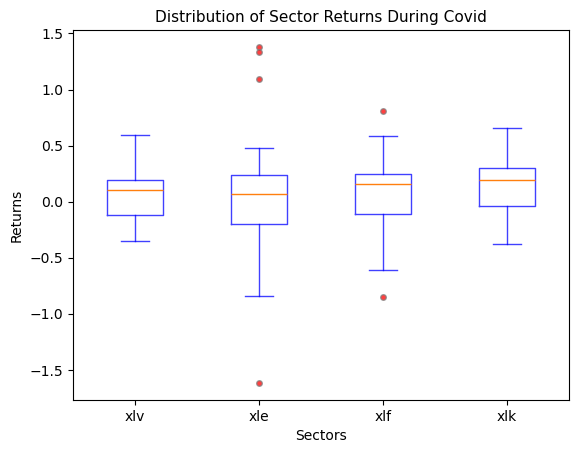

In [11]:
# Create a list for the symbols
symbol_list = ["xlv", "xle", "xlf", "xlk"]

# Create an empty list to store return values during covid
return_data_covid = []


# Loop over the symbol_list
for symbol in symbol_list:

    # Locate the rows that contain 'symbol' and get the covid 'returns' value
    return_value_covid = data_covid.loc[data_covid["symbol"] == symbol, "Monthly Average Returns"]

     #Update the symbol_list with the return value
    return_data_covid.append(return_value_covid)

 # Create a box plot that shows distribution of returns for each of the sectors
bp = plt.boxplot(return_data_covid, tick_labels=symbol_list, 
                 boxprops=dict(color='blue', alpha=0.75),          
            whiskerprops=dict(color='blue', alpha=0.75), 
            capprops=dict(color='blue', alpha=0.75) )

# Modify the color and size of outlier
plt.setp(bp['fliers'], markerfacecolor='red', alpha= 0.75, markeredgecolor= "grey", markersize=4)

# Add labels and tiltle
plt.ylabel('Returns')
plt.xlabel("Sectors")
plt.title("Distribution of Sector Returns During Covid", fontsize=11)

# Display the boxplot
plt.savefig("output_data/boxplot.png")
plt.show()   

In [12]:
# Analysis: 
# With long whiskers and most outliers, the energy(xle) sector had the most volatile monthly returns during Covid.
# The energy sector was followed by the finance(xlf) sector with fewer outliers.
# The technology and healthcare sector were most stable among the four reflecting their importance during the pandamic. 


In [13]:
# Calculate mean, median, standard deviation and variance for all the four sectors pre-covid
stats_pre = data_pre.groupby('symbol').agg({"Monthly Average Returns":['mean', 'median', 'std', 'var']})

# Remove the multi-level heading
stats_pre.columns = stats_pre.columns.droplevel(0)

# Display the resulting DataFrame
stats_pre.head()

,mean,median,std,var
symbol,,,,
xle,-0.022616,0.002878,0.280635,0.078756
xlf,0.041620,0.079487,0.219873,0.048344
xlk,0.090944,0.117102,0.208753,0.043578
xlv,0.053671,0.054946,0.185699,0.034484


In [14]:
# Calculate mean, median, standard deviation and variance for all the four sectors during covid
stats_covid = data_covid.groupby('symbol').agg({"Monthly Average Returns":['mean', 'median', 'std', 'var']})
# Remove the multi-level heading
stats_covid.columns = stats_covid.columns.droplevel(0)

# Display the resulting DataFrame
stats_covid.head()


,mean,median,std,var
symbol,,,,
xle,0.038864,0.066138,0.659244,0.434603
xlf,0.072919,0.152987,0.357404,0.127737
xlk,0.145016,0.189220,0.274596,0.075403
xlv,0.073003,0.100431,0.224396,0.050353


In [15]:
# Calculate mean, median, standard deviation and variance for all the four sectors post covid
stats_post = data_post.groupby('symbol').agg({"Monthly Average Returns":['mean', 'median', 'std', 'var']})
# Remove the multi-level heading
stats_post.columns = stats_post.columns.droplevel(0)

# Display the resulting DataFrame
stats_post.head()

,mean,median,std,var
symbol,,,,
xle,0.102922,0.084966,0.446949,0.199764
xlf,0.004986,-0.034230,0.313904,0.098536
xlk,0.031856,0.020470,0.367791,0.135270
xlv,-0.002421,-0.036876,0.204797,0.041942


In [16]:
# Create new dataframe with standard deviation values for all the four sectors
merge_df = pd.DataFrame({ "Pre-Covid std" : stats_pre["std"],
                         "Covid std": stats_covid["std"],
                         "Post-Covid std": stats_post["std"]})

merge_df




,Pre-Covid std,Covid std,Post-Covid std
symbol,,,
xle,0.280635,0.659244,0.446949
xlf,0.219873,0.357404,0.313904
xlk,0.208753,0.274596,0.367791
xlv,0.185699,0.224396,0.204797


In [17]:
# Transpose the DataFrame
sectors_merge_transposed = merge_df.T
sectors_merge_transposed
# Rename Columns
sectors_merge = sectors_merge_transposed.rename(columns={"xle": "Energy",
                                                         "xlf": "Finance",
                                                         "xlk": "Tech",
                                                         "xlv": "Healthcare"})
sectors_merge


symbol,Energy,Finance,Tech,Healthcare
Pre-Covid std,0.280635,0.219873,0.208753,0.185699
Covid std,0.659244,0.357404,0.274596,0.224396
Post-Covid std,0.446949,0.313904,0.367791,0.204797


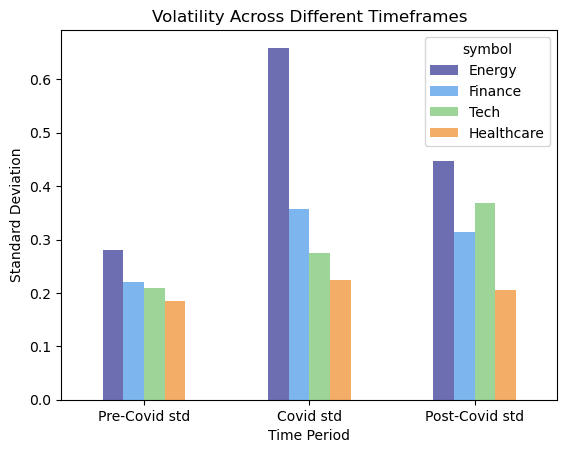

In [18]:
# Plot the multi-bar chart using pandas plot

sectors_merge.plot(kind="bar",  alpha=0.75, color=['#3C3D99', '#519DE9', '#7CC674', '#EF9234'])

plt.title("Volatility Across Different Timeframes")
plt.ylabel("Standard Deviation")
plt.xlabel("Time Period")
plt.xticks(rotation=360)
plt.savefig("output_data/stn.png")
plt.show()

In [19]:
# Sector Risk Analysis:
#  Energy consistently exhibited the highest volatility, while Healthcare proved to be the most stable.
# During the COVID period, Energy was the most volatile sector, followed by Financials, Technology, and finally Healthcare.
# The Energy sector's volatility, as measured by standard deviation, fluctuated significantly across all three timeframes (pre-covid, covid,Covid and post-covid), reflecting the sector's sensitivity.
# In contrast, Healthcare's volatility remained relatively stable throughout the entire period, showcasing its resilience and consistent performance during both stable and turbulent market conditions.

In [20]:

# Define a linear regression function
def linear_regression(x_axis, y_axis, sector_name):
    # Calculate regress values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    plt.scatter(x_axis, y_axis)    
    plt.plot(x_axis,regress_values,"r-")
    plt.xlabel("Volatility")
    plt.ylabel("Returns")
    plt.title(f"Risk vs Return: {sector_name}")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

     # Annotate the plot based on data ranges
    x_annotate = x_axis.min()  # Place annotation around the min of x values
    y_annotate = y_axis.max()  # Place annotation around the max of y values
    
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=13, color="red")
 
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

The r^2-value is: 0.005848381102557962


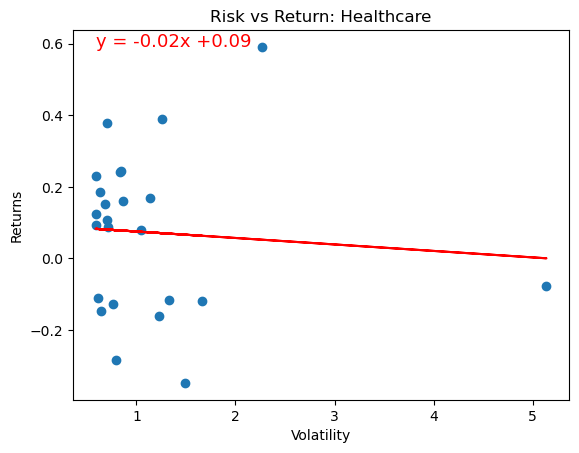

<Figure size 640x480 with 0 Axes>

In [21]:
# Linear regression during covid for Healthcare
# Define x-axis and y-axis
x_axis=data_covid.loc[data_covid["symbol"]=="xlv", "Monthly Standard Deviation"]
y_axis = data_covid.loc[data_covid["symbol"]=="xlv", "Monthly Average Returns"]

# create plot
linear_regression(x_axis, y_axis, "Healthcare")

plt.savefig("output_data/health.png")
plt.show()


In [22]:
# Analysis: There is no correlation between risk and return in the Healthcare sector during Covid

The r^2-value is: 0.034694924918811806


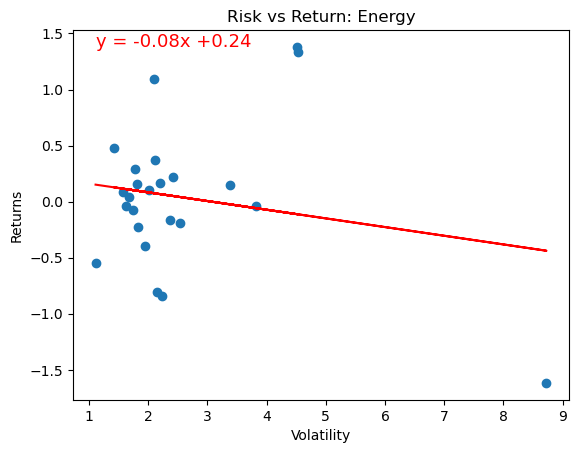

<Figure size 640x480 with 0 Axes>

In [23]:
# Linear regression during covid for Energy
# Define x-axis and y-axis
x_axis=data_covid.loc[data_covid["symbol"]=="xle", "Monthly Standard Deviation"]
y_axis = data_covid.loc[data_covid["symbol"]=="xle", "Monthly Average Returns"]

# create plot
linear_regression(x_axis, y_axis, "Energy")
plt.savefig("output_data/energy.png")
plt.show()

In [24]:
# Analysis: There is no correlation between risk and return in the Energy sector during Covid

The r^2-value is: 0.1544478478997012


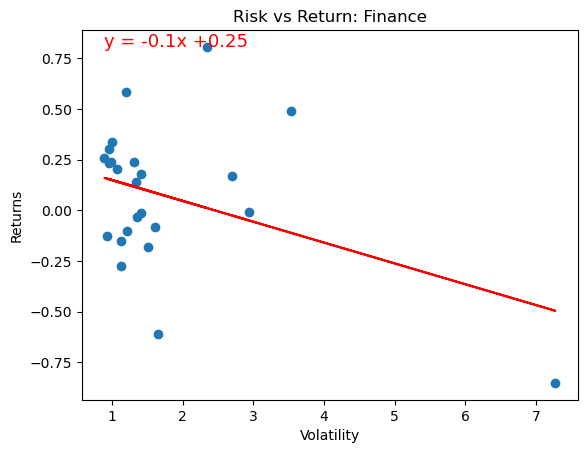

<Figure size 640x480 with 0 Axes>

In [25]:
# Linear regression during covid for Finance


# Define x-axis and y-axis
x_axis=data_covid.loc[data_covid["symbol"]=="xlf", "Monthly Standard Deviation"]
y_axis = data_covid.loc[data_covid["symbol"]=="xlf", "Monthly Average Returns"]

# create plot
linear_regression(x_axis, y_axis, "Finance")

plt.savefig("output_data/finance.png")
plt.show()

In [26]:
# Analysis: There is a neagtive weak correlation between risk and return in the Finance sector during Covid

The r^2-value is: 0.08032035497251118


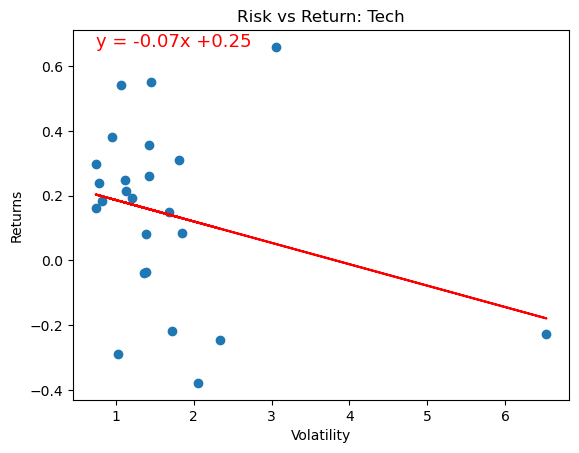

<Figure size 640x480 with 0 Axes>

In [27]:
# Linear regression during covid for Tech


# Define x-axis and y-axis
x_axis=data_covid.loc[data_covid["symbol"]=="xlk", "Monthly Standard Deviation"]
y_axis = data_covid.loc[data_covid["symbol"]=="xlk", "Monthly Average Returns"]

# create plot
linear_regression(x_axis, y_axis, "Tech")

plt.savefig("output_data/tech.png")
plt.show()

In [28]:
# Analysis: There is weak negative correlation between risk and return in the Technology sector during Covid